In [1]:
import pathlib
import numpy as np
import json
import glob

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
results_dir = pathlib.Path("../results/").resolve()
files = glob.glob(str(results_dir / "*json"))

In [3]:
# collect the results into a dictionary
results = {}

for filename in files:
    with open(filename, "r") as fp:
        experiment = json.load(fp)
        board_size = int(pathlib.Path(filename).stem.split("-")[-1])
        solver = experiment['solver']
        if solver in results:
            results[solver].append((board_size, experiment))
        else:
            results[solver] = [(board_size, experiment)]

In [4]:
def collect_traces(results, filter_func):
    """convert a results entry to x and y series"""
    x, y = list(zip(*[(x, filter_func(y)) for x, y in results]))
    idxs = np.argsort(x)
    return np.array(x)[idxs], np.array(y)[idxs]

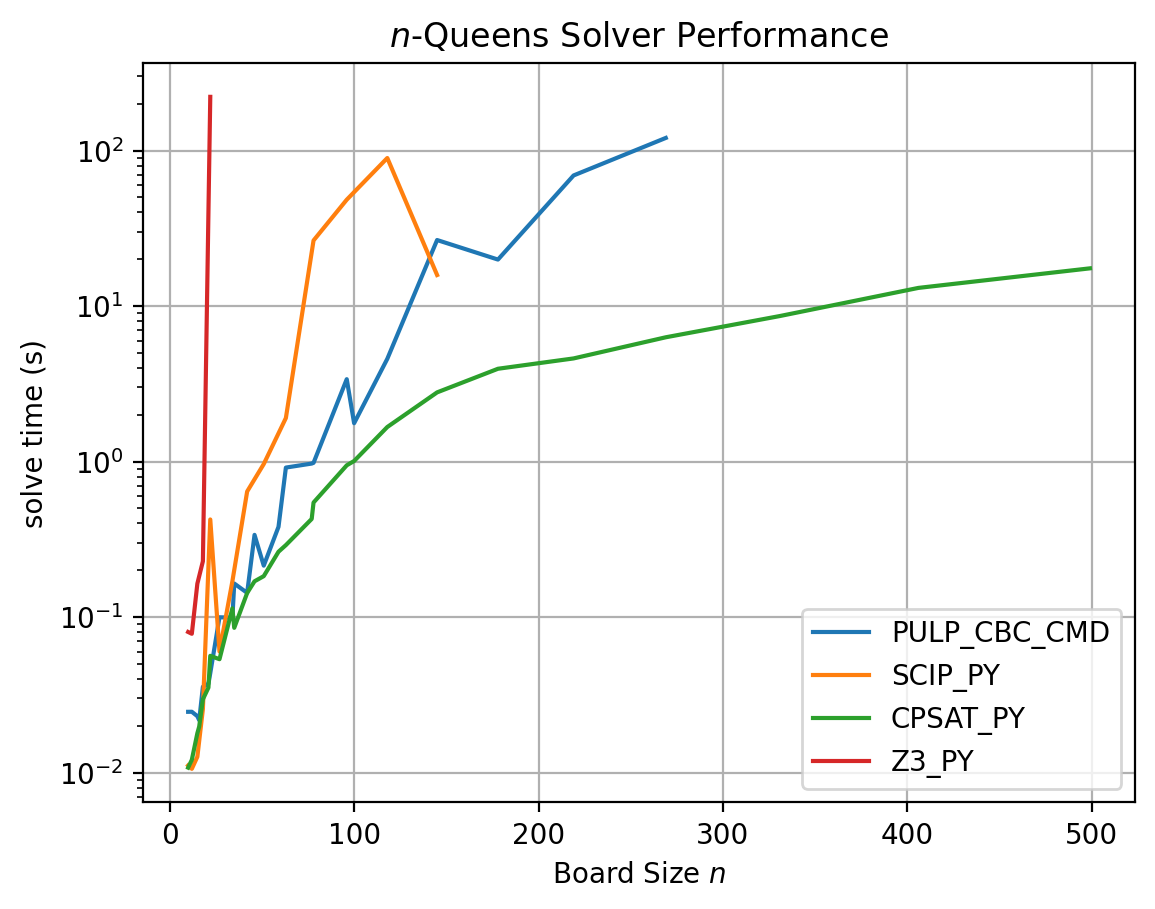

In [5]:
# plot the solve times
for solver_name in results.keys():
    x, y = collect_traces(results[solver_name], lambda x: x['solve_time'])
    plt.plot(x, y, label=solver_name)

plt.legend(loc = 'lower right')
plt.grid()
plt.xlabel('Board Size $n$')
plt.ylabel('solve time (s)')
plt.yscale('log')
plt.title('$n$-Queens Solver Performance')
plt.show()